# Task : Linear Regression

The task is to find out the score obtained by a student based on how much hours the student has worked.
Task is carried out by a simple Linear regression algorithm which will be also used to predict the score of the student based on the provided input hours.

 Step 1 : Importing libraries needed 

In [31]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Step 2 : Importing data from the provided link

In [32]:

data_url = "http://bit.ly/w-data"
ds = pd.read_csv(data_url)
print("Data imported successfully")
ds

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Step 3: Describe the data 

In [33]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Step 4 : Correlating the data ( i have not added heat map, it makes difficult to observe hence kept it simple.)

In [34]:
# correlatin between the data 
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Step 5 : Plotting the the two variables (i.e) Hours and Percentage

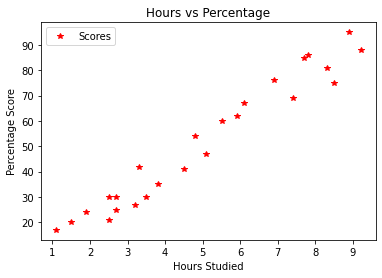

In [35]:
# Visualize the data
ds.plot( x = 'Hours',y = 'Scores',style = '*', color = 'r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


Step 6 : Extracting the data

In [36]:
# Extracting the data values X and y parameters
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

 Step 7 : Dividing the Data Set. 

 Data is divided into test and train set in order to avoid overfitting.

 The test and train sets are divided in 20% , 80% respectively.

It is the general format of dividing data.

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [38]:
from sklearn.linear_model import LinearRegression  
regress = LinearRegression()  
regress.fit(X_train, y_train) 

print("Training Successful.")

Training Successful.


Step 8 : Plot regression Line

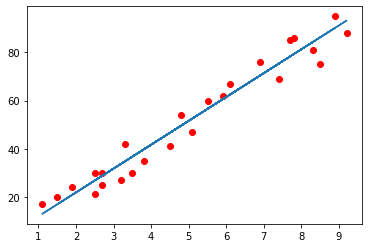

(array([9.91065648]), 2.018160041434683)

In [39]:
# Plotting the Linear regression line
line = regress.coef_ * X + regress.intercept_

# Plotting for the test data
plt.scatter(X, y,color ='r')
plt.plot(X, line);
plt.show()
regress.coef_,regress.intercept_


In [40]:
# predicting the given data
y_pred = regress.predict(X_test) 

Step 9 : Predicting the score for given input Hours

In [41]:
# predicting for given input of Hours(9.25) as per the given input for internship task 2 
Hours_new = np.array([9.25])
Hours_new = Hours_new.reshape(-1,1)
Scores_predict = regress.predict(Hours_new)
print("Hours studied : {}".format(Hours_new))
print("Percentage scored : {} ".format(Scores_predict))

Hours studied : [[9.25]]
Percentage scored : [93.69173249] 


In [42]:
# comparing actual and predicted value 
x = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
x

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Comparison result diagram (optional)

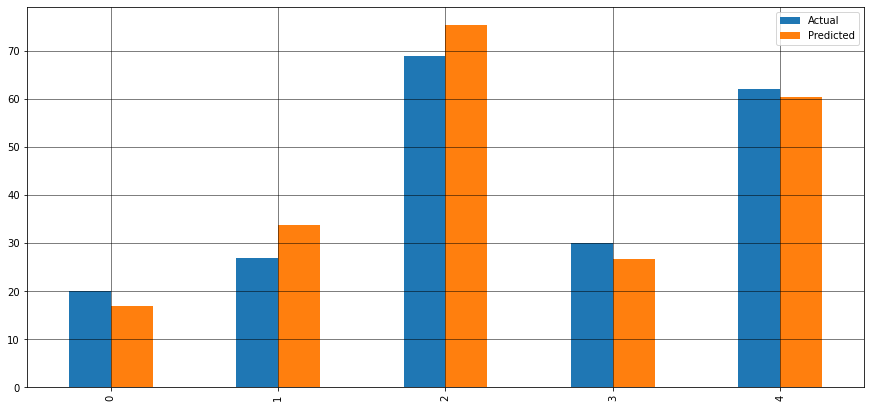

In [43]:

# We can also visualize comparison result as a bar graph
ds1 = x.head()
ds1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Step 10 : Evaluating the Regression Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.I have chosen the mean square error,mean absolute error and root mean squared error. There are many such metrics.

In [30]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
